# Human Activity Recognition with Smartphones

This notebook is a detailed reproduction of a DATA Abheeshth Mishra Kaggle notebook. I have studied and annotated sections that were initially challenging to understand.

URL: https://www.kaggle.com/code/abheeshthmishra/eda-of-human-activity-recognition/notebook


### Quick overview of dataset:
- Accelerometer and Gyroscope readings are takenf from 30 volunteers(refered as subjects) while performing the following 6 Activities.
1. Walking
2. Walking Upstairs
3. Walking Downstairs
4. Standing
5. Sitting
6. Lying.

- Readings are divided into a window of 2.56 seconds with 50% overlapping.
- Accelerometer readings are divided into gravity acceleration and body accleration readings, which has x,y and z componenets each.
- Gyroscope readings are the measure of angular velocities which has x,y and z components.
- Jerk signals are c alculated for BodyAcceleration readings.
- Fourier Transforms are maed on the above time readings to obtain frequency readings.
- Now, on all the base signal readings., mean, max, mad, sma, arcoefficient, energybands, entropy etc., are calculated for each window.
- We get a feature vector of 561 features and these features are givien in the dataset.
- Each window of readings is datapoint of 561 features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
train = pd.read_csv('train.csv')
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [2]:
train.shape

(7352, 563)

In [3]:
test = pd.read_csv('test.csv')

In [4]:
test.shape

(2947, 563)

# Data cleaning

## 1. check for duplicates

In [5]:
print('No of duplicates in train data: {}'.format(sum(train.duplicated())))
print('No of duplicates in test data: {}'.format(sum(test.duplicated())))


No of duplicates in train data: 0
No of duplicates in test data: 0


there are no duplicates in the train and test dataset

## 2. Checking for NaN/null values

In [6]:
print('We have {} Nan/Null values in train'.format(train.isnull().values.sum())) #is null -> true, false / values -> numpy array
print('We have {} NaN/Null values in test'.format(train.isnull().values.sum())) 

We have 0 Nan/Null values in train
We have 0 NaN/Null values in test


there are no null values

## 3. Check for data imbalance

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

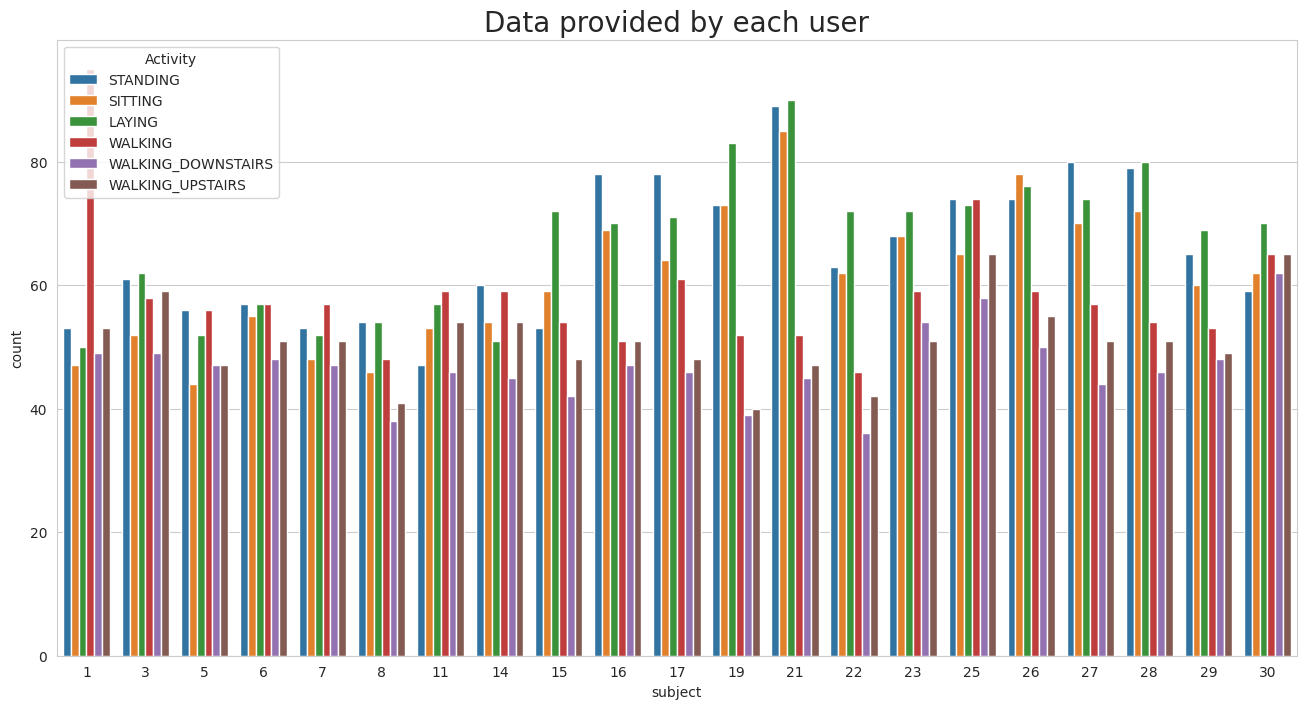

In [8]:
plt.figure(figsize = (16, 8))
plt.title('Data provided by each user', fontsize = 20)
sns.countplot(x = 'subject', hue = 'Activity', data = train)
plt.show()

we have got almost same number of reading from all the subjectes means. there are not sygnificant difference in reading

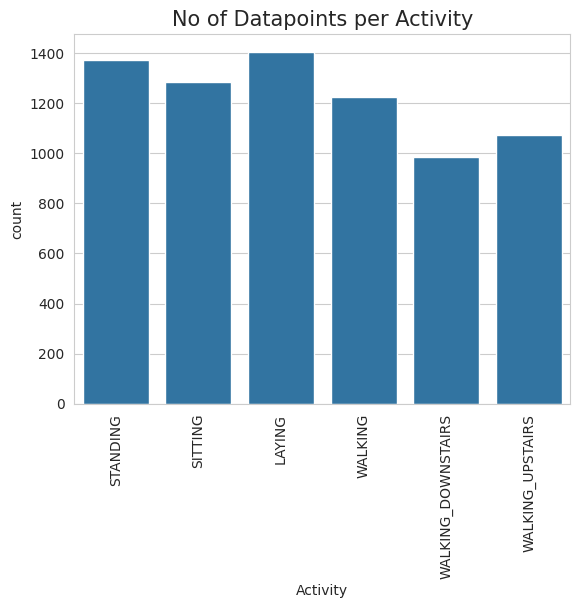

In [9]:
plt.title('No of Datapoints per Activity', fontsize = 15)
sns.countplot(x = 'Activity', data = train)
plt.xticks(rotation = 90)
plt.show()

our data is almost balanced

## 4. Changing feature names

In [10]:
columns = train.columns

# Removing '()' frim column names
columns = columns.str.replace('[()]', '') #정규표헌식이니 [] 안에 작성 ## str을 사용하는 이유는 원래는 Index객체인데, str도 유사하게 작동할 수 있음
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]', '')

train.columns = columns
test.columns = columns

test.columns

C:\Users\개발자1\AppData\Local\Temp\ipykernel_9696\36420571.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  columns = columns.str.replace('[()]', '') #정규표헌식이니 [] 안에 작성 ## str을 사용하는 이유는 원래는 Index객체인데, str도 유사하게 작동할 수 있음
C:\Users\개발자1\AppData\Local\Temp\ipykernel_9696\36420571.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  columns = columns.str.replace('[-]', '')
C:\Users\개발자1\AppData\Local\Temp\ipykernel_9696\36420571.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  columns = columns.str.replace('[,]', '')


Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'fBodyBodyGyroJerkMagkurtosis', 'angletBodyAccMeangravity',
       'angletBodyAccJerkMeangravityMean', 'angletBodyGyroMeangravityMean',
       'angletBodyGyroJerkMeangravityMean', 'angleXgravityMean',
       'angleYgravityMean', 'angleZgravityMean', 'subject', 'Activity'],
      dtype='object', length=563)

## 5.save this dataframe in a csv files

In [11]:
# train.to_csv('f_train.csv', index = False)
# test.to_csv('f_test.csv', index = False)

# EDA

### without domain knowledge EDA has no meaning, without EDA a problem has no soul.
도메인 지식 없이 EDA를 하는 것은 의미없고, EDA 없이는 문제에 본질을 찾지 못한다

### 1. Feature Engineering from Domain Knowledge
- Static and Dynamic Activities
    - In static activities (sit, stand, lie down) motion information will not be very useful.
    - In the dynamic activities (Walking, WalkingUpstairs, WalkingDownstairs) motion info will be significant.

## 2. Stationary and Moving activities are completely different

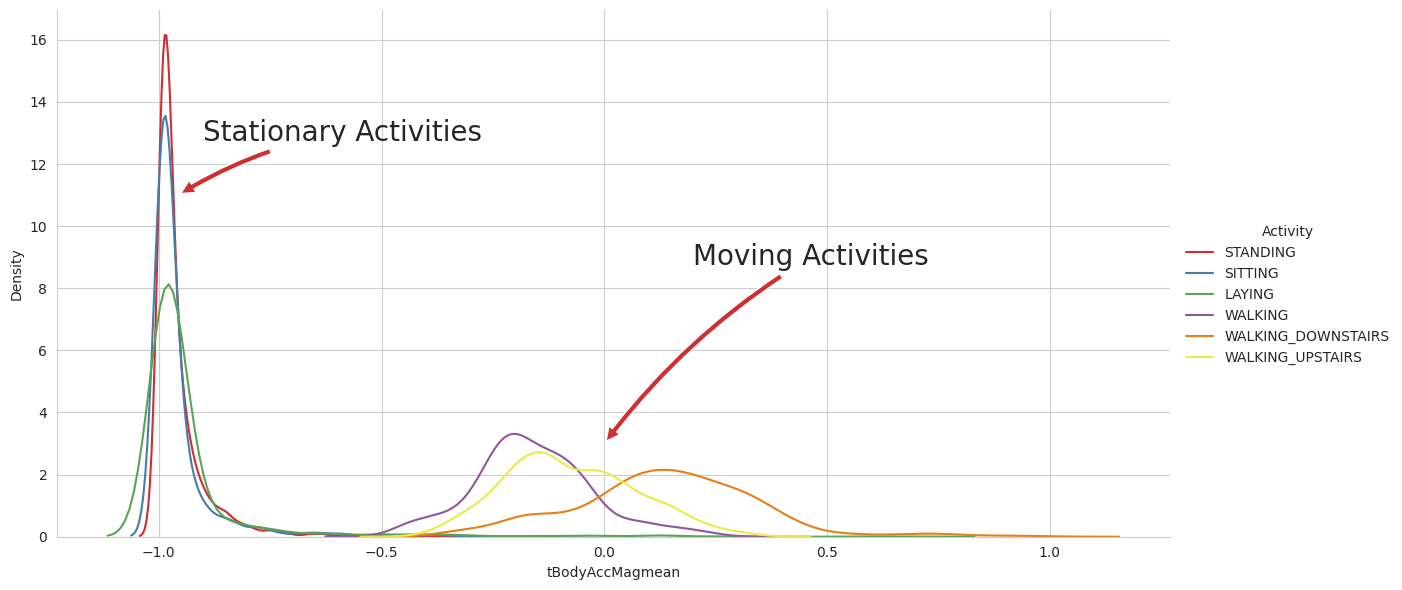

In [12]:
'''
Kdeplot은 Kernel Density Estimation이며, 커널 함수를 이용하여 히스토그램의 단점이었던 불확실한 분포를 해결하여 분포의 추정값을 보여줌. 추정 분포를 선으로 표현한 그래프이기 때문에 히스토그램을 smotthing한 그래프

'''
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='Activity', height=6,aspect=2)
facetgrid.map(sns.kdeplot, 'tBodyAccMagmean').add_legend()
plt.annotate("Stationary Activities", xy=(-0.956, 11), xytext=(-0.9, 13), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

As we can clearly see the difference between stationary activities and Moving Activities.

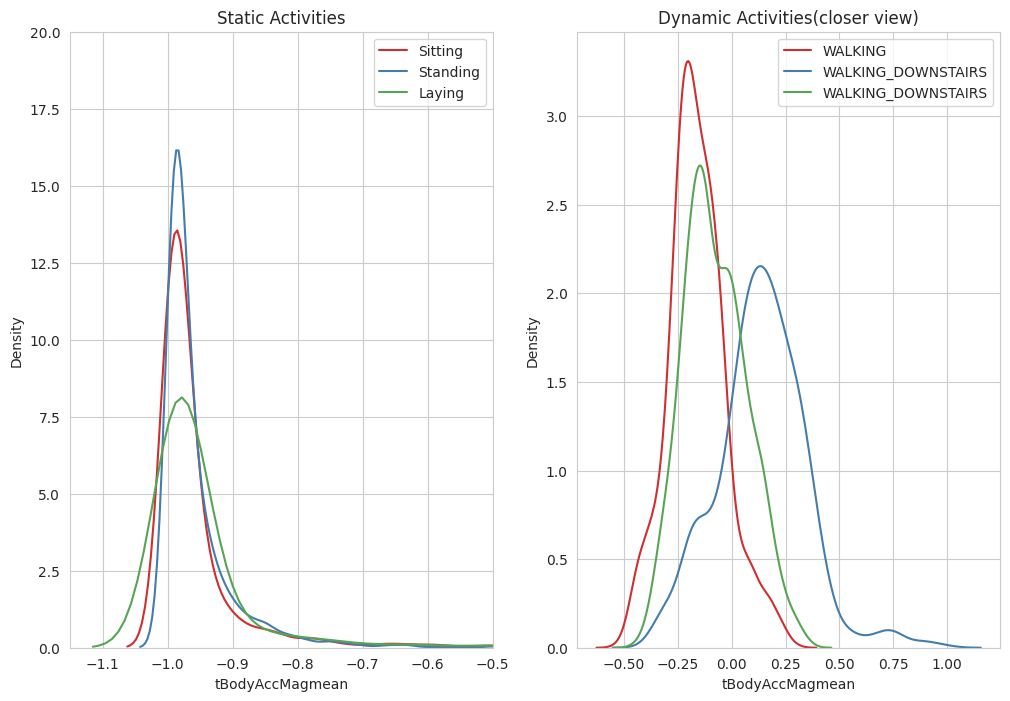

In [13]:
plt.figure(figsize = (12, 8))
plt.subplot(1, 2, 1)
plt.title('Static Activities')
sns.kdeplot(train[train['Activity'] == 'SITTING']['tBodyAccMagmean'], label = 'Sitting')
sns.kdeplot(train[train['Activity'] == 'STANDING']['tBodyAccMagmean'], label = 'Standing')
sns.kdeplot(train[train['Activity'] == 'LAYING']['tBodyAccMagmean'], label = 'Laying')
plt.axis([-1.15, -0.5, 0, 20])
plt.legend()
plt.subplot(1, 2, 2)
plt.title('Dynamic Activities(closer view)')
sns.kdeplot(train[train['Activity'] == 'WALKING']['tBodyAccMagmean'], label = 'WALKING')
sns.kdeplot(train[train['Activity'] == 'WALKING_DOWNSTAIRS']['tBodyAccMagmean'], label = 'WALKING_DOWNSTAIRS')
sns.kdeplot(train[train['Activity'] == 'WALKING_UPSTAIRS']['tBodyAccMagmean'], label = 'WALKING_DOWNSTAIRS')
plt.legend()
plt.show()

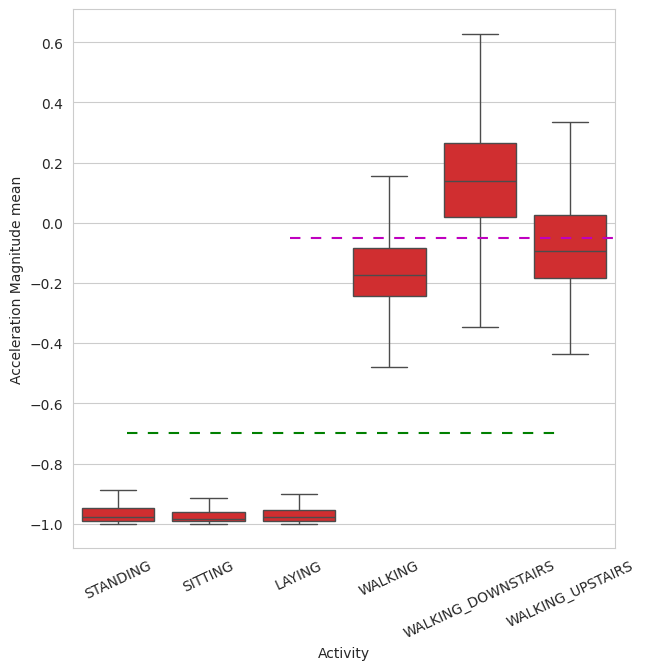

In [14]:
plt.figure(figsize = (7, 7))
sns.boxplot(x = 'Activity', y = 'tBodyAccMagmean', data = train, showfliers = False, saturation = 1) #showfilers = 이상치 여부, saturation 색상의 채도(선명도)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y = -0.7, xmin = 0.1, xmax = 0.9, dashes = (5,5), c = 'g') #axhline은 수평선을 그려줌, dashes = 점선(5포인트 길이, 간5포인트 간격)
plt.axhline(y = -0.05, xmin = 0.4, dashes = (5,5), c = 'm')
plt.xticks(rotation = 25)
plt.show()

### Observations:
- If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
    - tAccMean 값이 0.8보다 낮다는 것은 신체의 가속도 평균이 매우 낮다는 의미.
    - 신체가 크게 움직이지 않고 정적인 상태를 의미함.
    - 이 경우에 보통 서있기, 앉아 있기, 누워 있기와 같은 적은 정적 활동임.
- If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownStairs or WalkingUpStairs
    - tAccMean 값이 -0.6보다 크다는 것은 비교적 가속도가 높아졌다는 의미
    - 신체가 움직이고 있으며 동적인 활동과 관련이 있음
    - 신체 활동이 포함된 걷기, 계단 오르기, 계단 내리기와 같은 활동이 이루어 지고 있을 가능성 높음
- If tAccMean > 0.0 then the Activity is WalkingDownStairs.
    - 일반 걷기보다 더 높은 가속도 패턴이 나타나는 것을 의미
    - 계단을 내려갈 때 일반적인 걷기보다 다른 가속도 패턴이 나타날 수 있음
- We can classify 75% the Activity labels with some errors.
    - 이 분류 방식은 완벽하지 않으며 약 75% 정도의 정확도로 분류할 수 있다는 의미

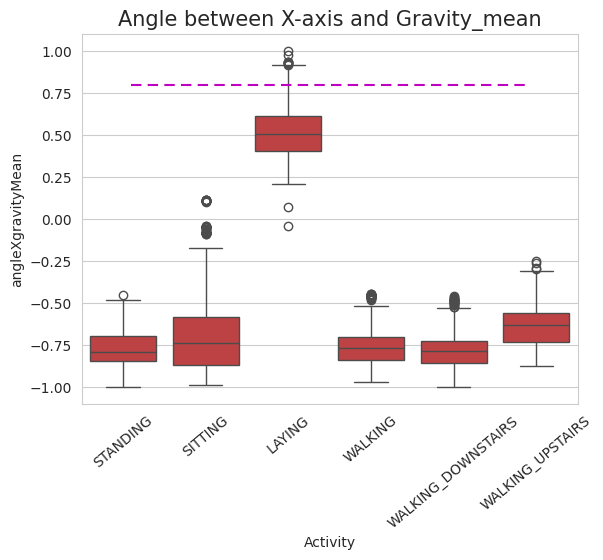

In [15]:
sns.boxplot(x = 'Activity', y = 'angleXgravityMean', data = train)
plt.axhline(y = 0.8, xmin = 0.1, xmax = 0.9, c = 'm', dashes = (5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize = 15)
plt.xticks(rotation = 40)
plt.show()

### Observation
- If angleX,gravityMean > 0 then Activity is Laying.
- We can classify all datatpoints belonging to Laying activity with just a single if else statement.

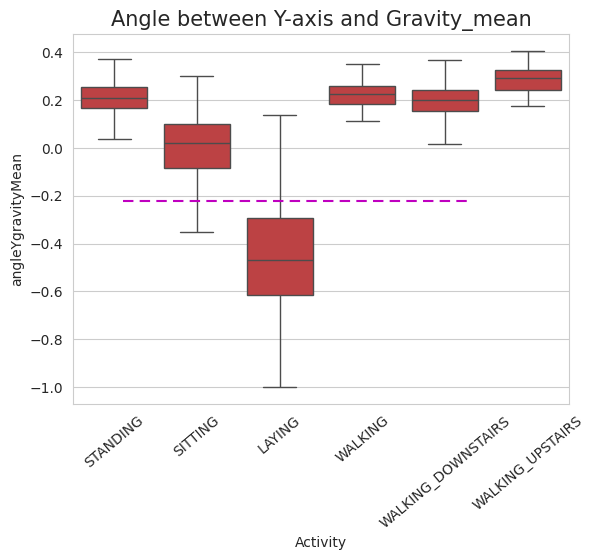

In [16]:
sns.boxplot(x = 'Activity', y = 'angleYgravityMean', data = train, showfliers = False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize = 15)
plt.xticks(rotation = 40)
plt.axhline(y = -0.22, xmin = 0.1, xmax = 0.8, dashes = (5,3), c ='m')
plt.show()

## Apply t-sne on the data

In [17]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

Here we will see these datapoints in 2 dimensions and try to observe the behavior of the datapoints

In [ ]:
'''
t-SNE(t-Distributed Sotchastic Neighbor Embedding) 알고리즘을 사용하여 고차원 데이터를 2차원으로 축소한 후, 각 클래스(Activity)에 따라 색상과 마커로 시각화하고, 이를 이미지 파일로 저장하는 함수
perplexity란,
t-SNE 알고리즘에서 perplexity는 주변 이웃의 수를 반영하는 하이퍼파라미터. = 직관적으, 한 포인트가 고려하는 "유사한" 다른 포인트(즉, 가까운 이웃)의 수에 대한 추정치
낮은 perplexity 값(예: 5)은 각 데이터 포인트 주변에서 매우 국소적인 구조에 초점을 맞추게하며, 높은 perplexity 값은 더 많은 이웃을 고려하여 전반적인(global) 구조를 반영함.
적절한 perplexity 값은 데이터의 특성에 따라 다르며, 보통 실험적으로 여러 값을 시도해보고 시각화 결과를 비교하여 결정함.
n_iter을 통해서 최적의 저차원 embedding을 찾기 위함. (기본 값은 1,000)
'''
def perform_tsne(X_data, y_data, perplexities, n_iter = 1000, img_name_prefix = 't-sne'):
    for index, perplexity in enumerate(perplexities):
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose = 2, perplexity = perplexity).fit_transform(X_data) # 2차원 공간으로 축소소
        print('Done..')

        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x' : X_reduced[:, 0], 'y': X_reduced[:, 1], 'label': y_data})

        sns.lmplot(data = df, x = 'x', y = 'y', hue = 'label', fit_reg = False, height = 8, palette = 'Set1', markers = ['^', 'v', 's', 'o', '1', '2'])
        plt.title('perplexity : {} and max_iter : {}'.format(perplexity, n_iter))
        img_name = img_name_prefix + '__perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working director...')
        plt.savefig(img_name)
        plt.show()
        print('Done')


performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.015s...
[t-SNE] Computed neighbors for 7352 samples in 0.287s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961446
[t-SNE] Computed conditional probabilities in 0.031s
[t-SNE] Iteration 50: error = 107.1375580, gradient norm = 0.0390101 (50 iterations in 2.452s)
[t-SNE] Iteration 100: error = 95.6853561, gradient norm = 0.0138748 (50 iterations in 

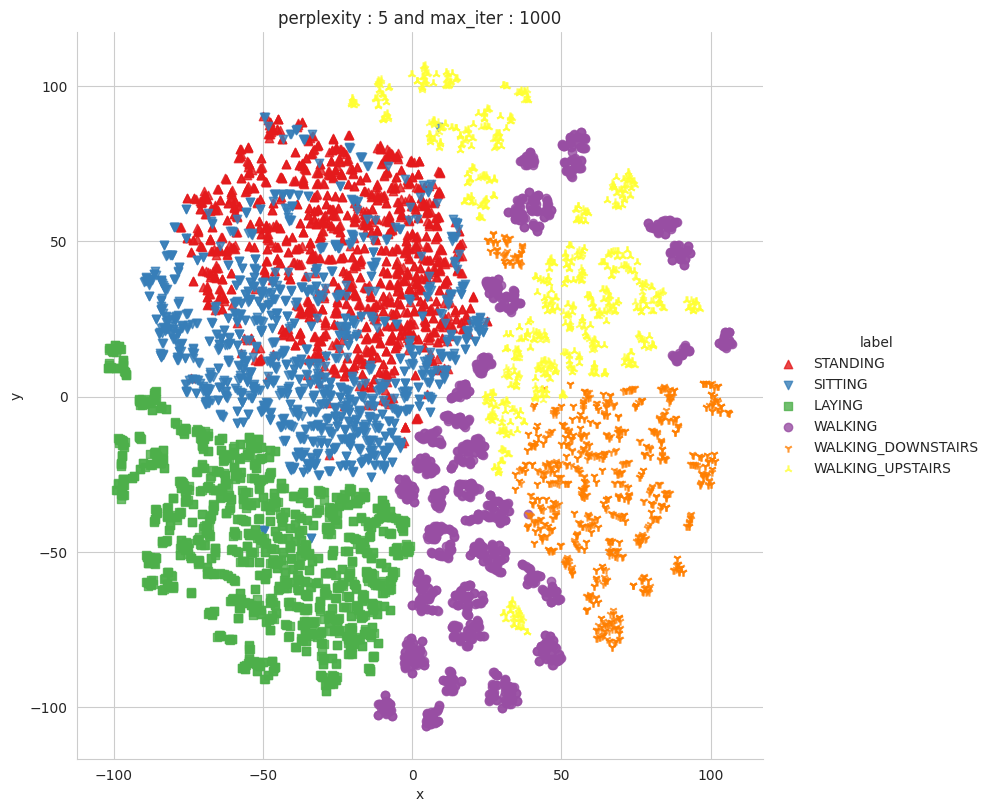

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.012s...
[t-SNE] Computed neighbors for 7352 samples in 0.322s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133827
[t-SNE] Computed conditional probabilities in 0.052s
[t-SNE] Iteration 50: error = 97.8873138, gradient norm = 0.0372896 (50 iterations in 2.602s)
[t-SNE] Iteration 100: error = 88.9314117, gradient norm = 0.0098898 (50 iteration

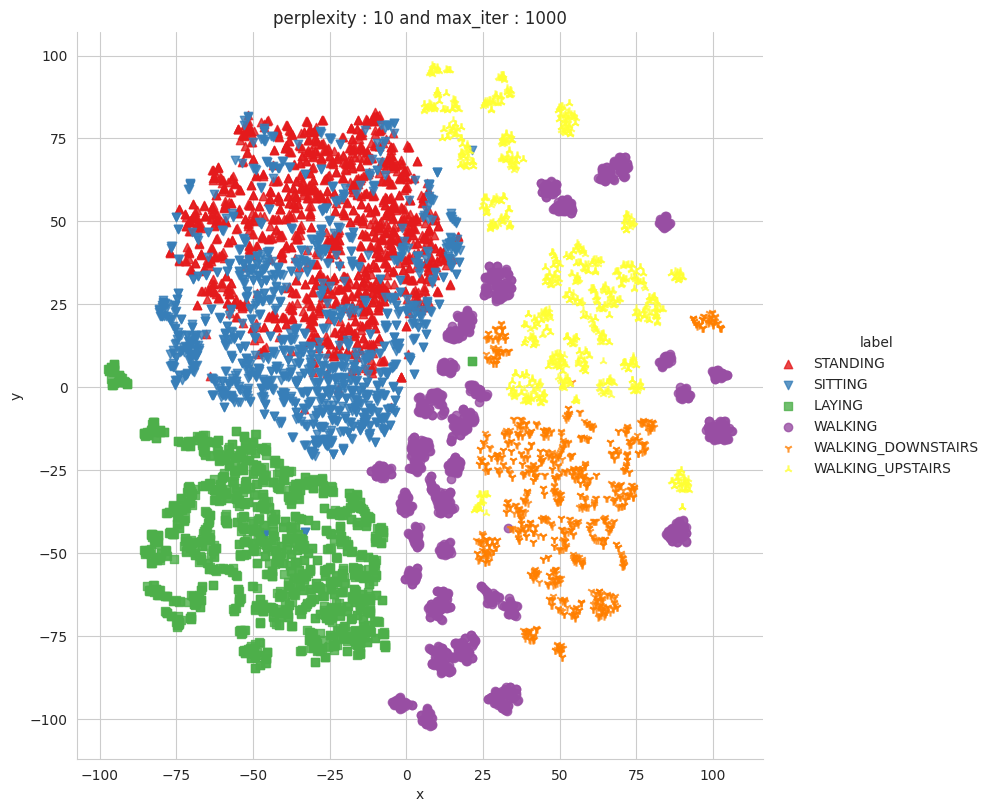

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.013s...
[t-SNE] Computed neighbors for 7352 samples in 0.314s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274336
[t-SNE] Computed conditional probabilities in 0.097s
[t-SNE] Iteration 50: error = 89.2904282, gradient norm = 0.0293207 (50 iterations in 2.922s)
[t-SNE] Iteration 100: error = 82.9572754, gradient norm = 0.0074990 (50 iteration

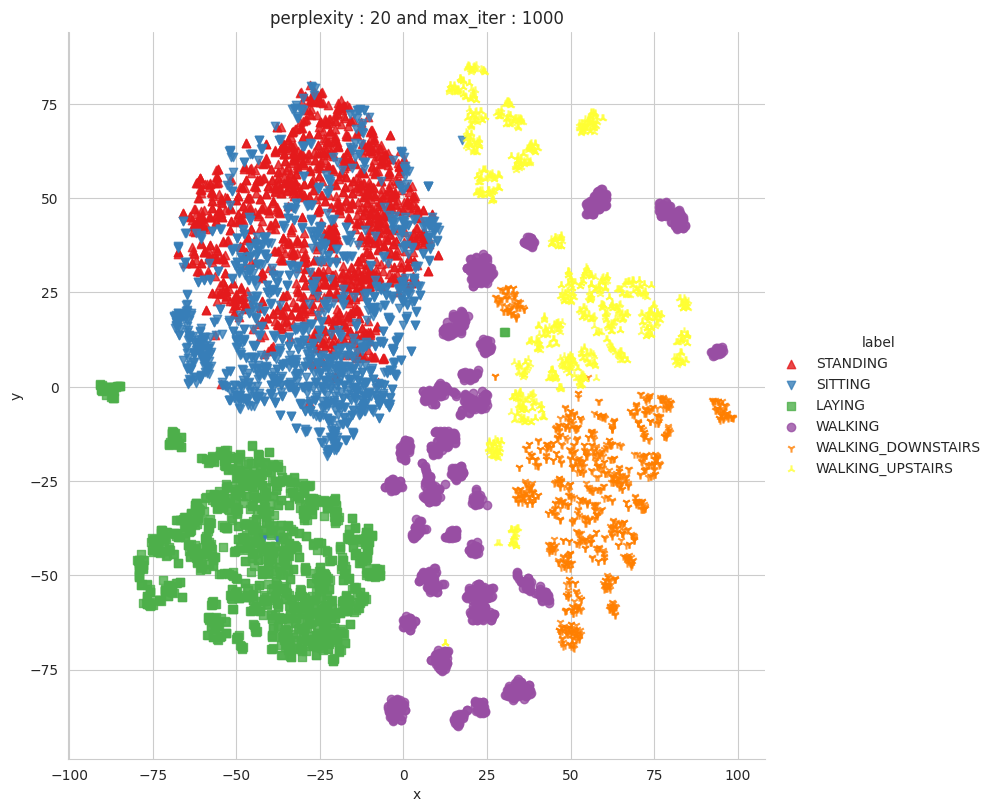

Done


In [ ]:
X_pre_tsne = train.drop(['subject', 'Activity'], axis = 1)
y_pre_tsne = train['Activity']
perform_tsne(X_data = X_pre_tsne, y_data = y_pre_tsne, perplexities = [5, 10, 20]) # perplexities 값에 따라 시각화 결과가 달라짐.

여기 코드는 좀 더 데이터를 뜯어보는 형식임
perplexity를 진행해서 배움
뭔가 loso를 적용하지 않고 그냥 모든 맞춤형인 아닌 activity를 맞추려고하는 느낌이 듬. 